In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [9]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [10]:
sent1

['Call', 'me', 'Ishmael', '.']

#### Counting vocab of words

In [11]:
text7

<Text: Wall Street Journal>

In [12]:
print(sent7)

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


In [13]:
len(text7)# number of words in corpus

100676

In [14]:
len(set(text7)) # num of unique words

12408

In [15]:
list(set(text7))[:10]

['takeover',
 'microwave',
 'twist',
 'Corporate',
 'luxury',
 'TRANSPLANT',
 'Dodger',
 'appreciation',
 'heated',
 'pealing']

#### freq of words

In [16]:
dist = FreqDist(text7)

In [24]:
dist

FreqDist({',': 4885, 'the': 4045, '.': 3828, 'of': 2319, 'to': 2164, 'a': 1878, 'in': 1572, 'and': 1511, '*-1': 1123, '0': 1099, ...})

In [23]:
import matplotlib.pyplot as plt

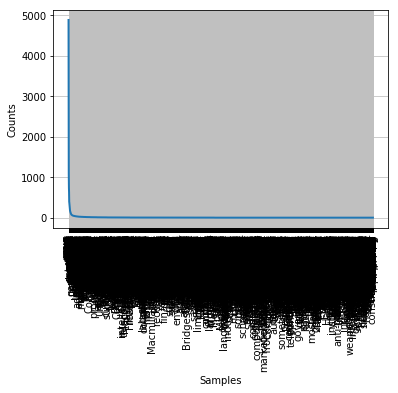

In [25]:
dist.plot()

In [26]:
len(dist)

12408

In [19]:
vocab1 = list(dist.keys())
vocab1[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

In [27]:
dist['four']

20

In [30]:
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
print(freqwords)

['billion', 'company', 'president', 'because', 'market', 'million', 'shares', 'trading', 'program']


#### Normalizing and stemming

In [27]:
input1 = 'List listed lists listing listings'

Normalization

In [28]:
words1 = input1.lower().split(' ')
words1

['list', 'listed', 'lists', 'listing', 'listings']

Stemming

In [29]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

In [46]:
udhr = nltk.corpus.udhr.words('English-Latin1')

In [47]:
print(udhr[:20])

['Universal', 'Declaration', 'of', 'Human', 'Rights', 'Preamble', 'Whereas', 'recognition', 'of', 'the', 'inherent', 'dignity', 'and', 'of', 'the', 'equal', 'and', 'inalienable', 'rights', 'of']


Porter stemmer returns prefixes/roots

In [49]:
print([porter.stem(t) for t in udhr[:20]])

['univers', 'declar', 'of', 'human', 'right', 'preambl', 'wherea', 'recognit', 'of', 'the', 'inher', 'digniti', 'and', 'of', 'the', 'equal', 'and', 'inalien', 'right', 'of']


Lemmatization : stemming but resulting terms are still words

In [51]:
WNLemma = nltk.WordNetLemmatizer()

print([WNLemma.lemmatize(t) for t in udhr[:20]])
#'Rights' wasn't lemmatized because of capital R

['Universal', 'Declaration', 'of', 'Human', 'Rights', 'Preamble', 'Whereas', 'recognition', 'of', 'the', 'inherent', 'dignity', 'and', 'of', 'the', 'equal', 'and', 'inalienable', 'right', 'of']


#### Tokenizing

In [54]:
text11 = "Children shouldn't drink before going to bed"
text11.split(' ')

['Children', "shouldn't", 'drink', 'before', 'going', 'to', 'bed']

In [55]:
nltk.word_tokenize(text11)
# extracts negation

['Children', 'should', "n't", 'drink', 'before', 'going', 'to', 'bed']

#### Sentence splitting

In [31]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
text12 = "Ceci est la première phrase. Un litre de lait aux U.S. coute $2.3 dollars. Est-ce que c'est la dernière phrase. Oui, ça l'est!"

In [32]:
# cannot split on '.' because many '.'' char for decimals, etc.
# same problem for capital letters
sentences = nltk.sent_tokenize(text12)
sentences

['Ceci est la première phrase.',
 'Un litre de lait aux U.S. coute $2.3 dollars.',
 "Est-ce que c'est la dernière phrase.",
 "Oui, ça l'est!"]